<a href="https://colab.research.google.com/github/saro0307/Car-prices-predict/blob/main/car_prices_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# Models
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression


In [3]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error,r2_score
def cal_error(y_true, y_predict):
    print(f'r square: {r2_score(y_true, y_predict)}')
    print(f'mae: {mean_absolute_error(y_true, y_predict)}')
    print(f'mse root: {np.sqrt(mean_squared_error(y_true, y_predict))}')
    print(f'mape: {mean_absolute_percentage_error(y_true, y_predict)}')

In [4]:
df_train=pd.read_csv('/content/test.csv')
df_test=pd.read_csv('/content/train.csv')

In [5]:
print(f'The train data shape{df_train.shape}')
df_train

The train data shape(8245, 18)


,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,44020629,-,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN
1,45784798,-,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN
2,45800257,-,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN
4,45814303,-,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8240,44824410,1357,FIAT,Stilo,2004,Universal,No,Petrol,1.6,164000 km,4,Manual,Front,04-May,Left wheel,Blue,6,NaN
8241,45682346,-,BMW,528 F10,2012,Sedan,Yes,Petrol,2.8 Turbo,156000 km,4,Tiptronic,Front,04-May,Left wheel,Black,6,NaN
8242,45649860,1646,LEXUS,GX 460,2015,Jeep,Yes,Petrol,4.6,102907 km,8,Automatic,4x4,04-May,Left wheel,Black,0,NaN
8243,45809706,784,TOYOTA,Aqua,2017,Hatchback,Yes,Petrol,1.5,3000 km,4,Automatic,Front,04-May,Left wheel,Green,4,NaN


In [6]:
print(f'The test data shape{df_test.shape}')
df_test

The test data shape(19237, 18)


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [7]:
columns = df_train.columns
columns

Index(['ID', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'Price'],
      dtype='object')

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8245 entries, 0 to 8244
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8245 non-null   int64  
 1   Levy              8245 non-null   object 
 2   Manufacturer      8245 non-null   object 
 3   Model             8245 non-null   object 
 4   Prod. year        8245 non-null   int64  
 5   Category          8245 non-null   object 
 6   Leather interior  8245 non-null   object 
 7   Fuel type         8245 non-null   object 
 8   Engine volume     8245 non-null   object 
 9   Mileage           8245 non-null   object 
 10  Cylinders         8245 non-null   int64  
 11  Gear box type     8245 non-null   object 
 12  Drive wheels      8245 non-null   object 
 13  Doors             8245 non-null   object 
 14  Wheel             8245 non-null   object 
 15  Color             8245 non-null   object 
 16  Airbags           8245 non-null   int64  


In [9]:
df_train.duplicated().sum()

75

In [10]:
df_train.drop_duplicates(inplace=True)
df_train.reset_index(drop=True, inplace=True)
df_train

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,44020629,-,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN
1,45784798,-,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN
2,45800257,-,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN
4,45814303,-,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8165,44824410,1357,FIAT,Stilo,2004,Universal,No,Petrol,1.6,164000 km,4,Manual,Front,04-May,Left wheel,Blue,6,NaN
8166,45682346,-,BMW,528 F10,2012,Sedan,Yes,Petrol,2.8 Turbo,156000 km,4,Tiptronic,Front,04-May,Left wheel,Black,6,NaN
8167,45649860,1646,LEXUS,GX 460,2015,Jeep,Yes,Petrol,4.6,102907 km,8,Automatic,4x4,04-May,Left wheel,Black,0,NaN
8168,45809706,784,TOYOTA,Aqua,2017,Hatchback,Yes,Petrol,1.5,3000 km,4,Automatic,Front,04-May,Left wheel,Green,4,NaN


In [11]:
cat_col = [col for col in df_train.columns if df_train[col].dtype=='object']
cat_col

['Levy',
 'Manufacturer',
 'Model',
 'Category',
 'Leather interior',
 'Fuel type',
 'Engine volume',
 'Mileage',
 'Gear box type',
 'Drive wheels',
 'Doors',
 'Wheel',
 'Color']

In [12]:
df_train[cat_col]

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
0,-,VOLKSWAGEN,Golf,Hatchback,No,Diesel,2.0 Turbo,0 km,Manual,Front,02-Mar,Left wheel,Grey
1,-,HYUNDAI,Sonata,Sedan,Yes,Petrol,2.4,26000 km,Tiptronic,Front,04-May,Left wheel,Grey
2,-,NISSAN,Tiida,Sedan,No,Petrol,1.5,168000 km,Automatic,Front,04-May,Right-hand drive,Sky blue
3,975,VOLVO,XC90,Jeep,Yes,Petrol,3.2,143000 km,Automatic,4x4,04-May,Left wheel,Blue
4,-,OPEL,Astra,Hatchback,No,Petrol,1.6,200000 km,Manual,Front,04-May,Left wheel,Black
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8165,1357,FIAT,Stilo,Universal,No,Petrol,1.6,164000 km,Manual,Front,04-May,Left wheel,Blue
8166,-,BMW,528 F10,Sedan,Yes,Petrol,2.8 Turbo,156000 km,Tiptronic,Front,04-May,Left wheel,Black
8167,1646,LEXUS,GX 460,Jeep,Yes,Petrol,4.6,102907 km,Automatic,4x4,04-May,Left wheel,Black
8168,784,TOYOTA,Aqua,Hatchback,Yes,Petrol,1.5,3000 km,Automatic,Front,04-May,Left wheel,Green


In [13]:
print(df_train.Levy.value_counts())
df_train[df_train.Levy =='-']

-       2422
765      222
891      203
640      176
639      165
        ... 
1885       1
4053       1
1442       1
676        1
884        1
Name: Levy, Length: 434, dtype: int64


,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,44020629,-,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN
1,45784798,-,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN
2,45800257,-,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN
4,45814303,-,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0,NaN
13,45744987,-,HYUNDAI,Sonata hybrid,2012,Sedan,Yes,Hybrid,2.5,95000 km,4,Tiptronic,Front,04-May,Left wheel,Brown,10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8149,45789896,-,NISSAN,Fuga,2006,Sedan,Yes,Petrol,2.5,180000 km,6,Tiptronic,Rear,04-May,Right-hand drive,White,6,NaN
8153,45779474,-,SUBARU,Forester,2012,Jeep,Yes,Petrol,2.4,150000 km,7,Tiptronic,4x4,04-May,Left wheel,Grey,6,NaN
8156,45796220,-,KIA,Optima EX,2013,Sedan,Yes,Petrol,2.4,123200 km,4,Tiptronic,Front,04-May,Left wheel,Red,8,NaN
8163,44012311,-,VOLKSWAGEN,CC,2009,Coupe,Yes,Petrol,2,1000 km,6,Tiptronic,Front,04-May,Left wheel,White,8,NaN


<Axes: ylabel='Frequency'>

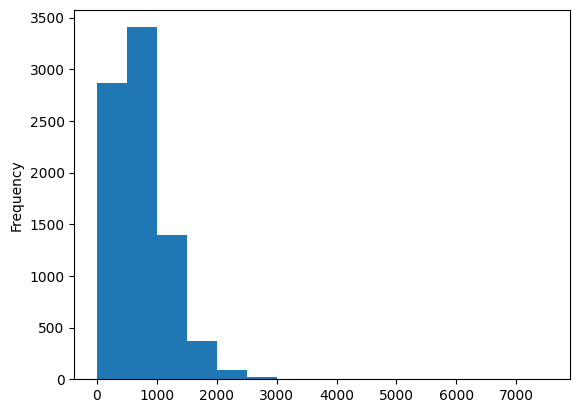

In [14]:
df_train.Levy = df_train.Levy.map(lambda x:0 if x== '-' else x)
df_train.Levy=df_train.Levy.astype('float')
df_train.Levy.plot.hist(bins=15)


In [15]:
df_train['Leather interior'].value_counts()

Yes    5920
No     2250
Name: Leather interior, dtype: int64

<Axes: >

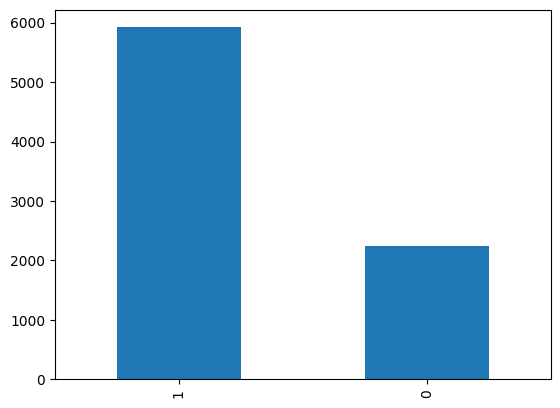

In [16]:
df_train['Leather interior']=df_train['Leather interior'].map(lambda x:True if x== 'Yes' else False)
df_train['Leather interior']= df_train['Leather interior']*1
df_train['Leather interior'].value_counts().plot.bar()

In [17]:
df_train.Mileage= df_train.Mileage.map(lambda x: x.rstrip(' km'))
df_train.Mileage= df_train.Mileage.astype('float')

In [18]:
df_train.Mileage.value_counts().sort_index()

0.000000e+00    289
8.000000e+00      1
1.000000e+01      2
1.110000e+02      1
1.280000e+02      1
               ... 
5.876454e+07      1
1.111111e+08      1
2.000000e+08      1
5.582121e+08      1
2.147484e+09      4
Name: Mileage, Length: 3978, dtype: int64

4    7769
2     349
5      52
Name: Doors, dtype: int64

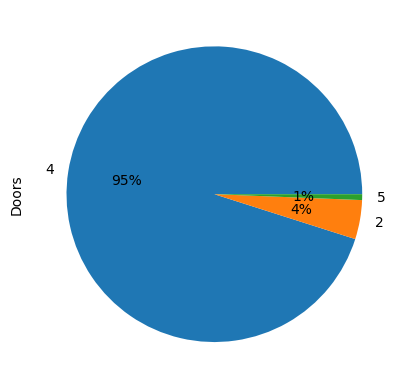

In [19]:
df_train.Doors=df_train.Doors.map(lambda x: x.rstrip('-May'))
df_train.Doors=df_train.Doors.map(lambda x: x.rstrip('-Mar'))
df_train.Doors=df_train.Doors.map(lambda x: x.lstrip('>'))
df_train.Doors= df_train.Doors.astype('int')
df_train.Doors.value_counts().plot.pie(autopct= '%1.0f%%')
df_train.Doors.value_counts()

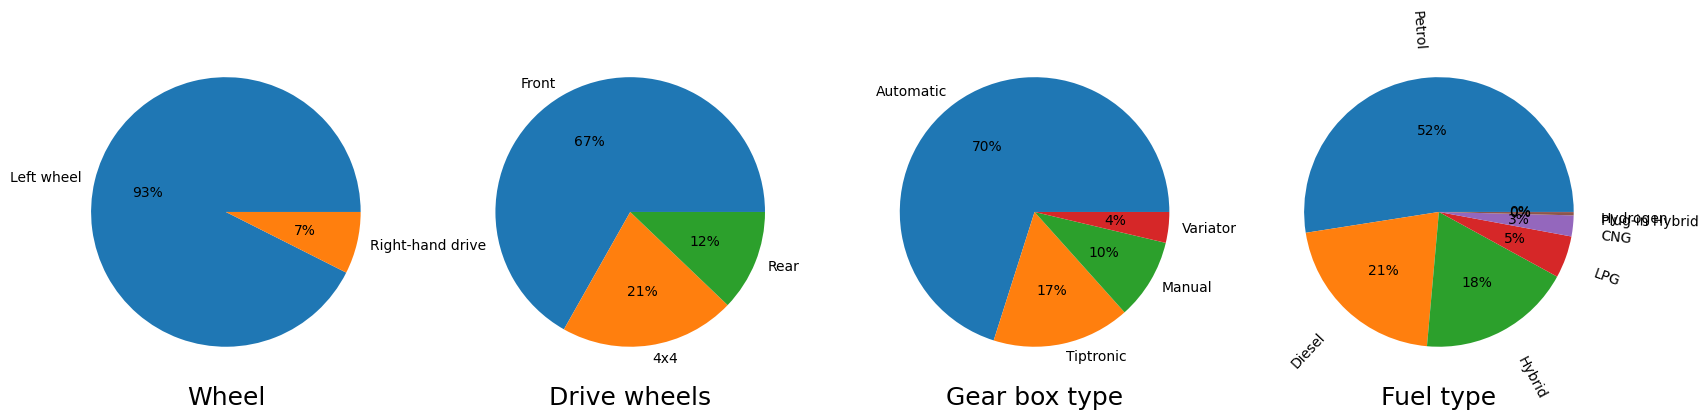

In [20]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
df_train.Wheel.value_counts().plot.pie(autopct='%1.0f%%')
plt.ylabel('')
plt.xlabel('Wheel',fontsize=18)
plt.subplot(1,4,2)
df_train['Drive wheels'].value_counts().plot.pie(autopct='%1.0f%%')
plt.ylabel('')
plt.xlabel('Drive wheels',fontsize=18)
plt.subplot(1,4,3)
df_train['Gear box type'].value_counts().plot.pie(autopct='%1.0f%%')
plt.ylabel('')
plt.xlabel('Gear box type',fontsize=18)
plt.subplot(1,4,4)
df_train['Fuel type'].value_counts().plot.pie(autopct='%1.0f%%', pctdistance =0.6,labeldistance =1.2,rotatelabels =True)
plt.ylabel('')
plt.xlabel('Fuel type',fontsize=18)
plt.show()



In [21]:
wheels= pd.get_dummies(df_train[['Wheel','Drive wheels','Gear box type', 'Fuel type']], prefix=['Wheel',
                                                                                                'Drive', 'Gear', 'Fuel'])
df_train =pd.concat([df_train, wheels], axis=1)
df_train.drop(['Wheel','Drive wheels','Gear box type', 'Fuel type'], axis=1, inplace=True)

In [22]:
df_train['Engine volume'].value_counts()

2            1656
2.5           915
1.8           759
1.6           598
1.5           542
             ... 
4.2 Turbo       1
3.7 Turbo       1
4.8 Turbo       1
10.8            1
2.6 Turbo       1
Name: Engine volume, Length: 97, dtype: int64

<Axes: ylabel='Frequency'>

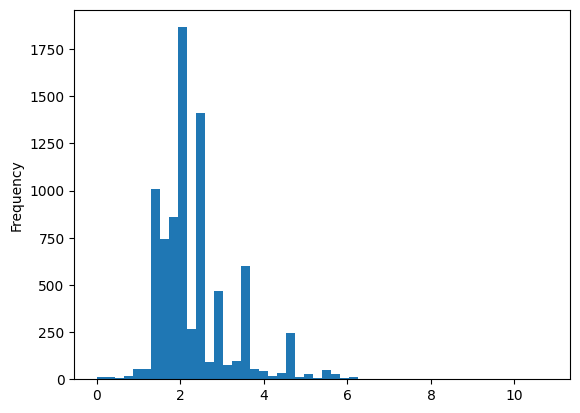

In [23]:
df_train['Turbo']=df_train['Engine volume'].str.contains('Turbo')
df_train['Engine volume']=df_train['Engine volume'].map(lambda x:x.rstrip(' Turbo'))
df_train['Engine volume']= df_train['Engine volume'].astype('float')
df_train['Engine volume'].plot.hist(bins= 50)

In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8170 entries, 0 to 8169
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      8170 non-null   int64  
 1   Levy                    8170 non-null   float64
 2   Manufacturer            8170 non-null   object 
 3   Model                   8170 non-null   object 
 4   Prod. year              8170 non-null   int64  
 5   Category                8170 non-null   object 
 6   Leather interior        8170 non-null   int64  
 7   Engine volume           8170 non-null   float64
 8   Mileage                 8170 non-null   float64
 9   Cylinders               8170 non-null   int64  
 10  Doors                   8170 non-null   int64  
 11  Color                   8170 non-null   object 
 12  Airbags                 8170 non-null   int64  
 13  Price                   0 non-null      float64
 14  Wheel_Left wheel        8170 non-null   

In [25]:
print(f'the number of unique values in manufacturing are {len(df_train["Manufacturer"].value_counts())}')
df_train['Manufacturer'].value_counts()

the number of unique values in manufacturing are 62


HYUNDAI          1582
TOYOTA           1505
MERCEDES-BENZ     896
FORD              476
CHEVROLET         451
                 ... 
FOTON               1
HUMMER              1
MG                  1
MOSKVICH            1
BENTLEY             1
Name: Manufacturer, Length: 62, dtype: int64

In [26]:
print(f'the number of unique values in Model are {len(df_train["Model"].value_counts())}')
df_train['Model'].value_counts()

the number of unique values in Model are 995


Sonata     477
Prius      448
Camry      387
Elantra    374
E 350      253
          ... 
Vitara       1
X5 E53       1
F350         1
FIT L        1
528 F10      1
Name: Model, Length: 995, dtype: int64

In [27]:
print(f'the number of unique values in Category are {len(df_train["Category"].value_counts())}')
df_train['Category'].value_counts()

the number of unique values in Category are 11


Sedan          3770
Jeep           2319
Hatchback      1180
Minivan         285
Coupe           212
Universal       158
Microbus        120
Goods wagon      77
Cabriolet        25
Pickup           20
Limousine         4
Name: Category, dtype: int64

In [28]:
print(f'the number of unique values in Color are {len(df_train["Color"].value_counts())}')
df_train['Color'].value_counts()

the number of unique values in Color are 16


Black            2130
White            1893
Silver           1616
Grey             1015
Blue              611
Red               252
Green             141
Orange            105
Carnelian red      87
Brown              83
Beige              63
Golden             62
Sky blue           54
Yellow             39
Purple             14
Pink                5
Name: Color, dtype: int64

In [29]:
Color_lb= LabelEncoder().fit(df_train['Color'])
Category_lb= LabelEncoder().fit(df_train['Category'])
Model_lb= LabelEncoder().fit(df_train['Model'])
Manufacturer_lb= LabelEncoder().fit(df_train['Manufacturer'])

df_train['Color_num']= Color_lb.transform(df_train['Color'])
df_train['Category_num']= Category_lb.transform(df_train['Category'])
df_train['Model_num']= Model_lb.transform(df_train['Model'])
df_train['Manufacturer_num']= Manufacturer_lb.transform(df_train['Manufacturer'])


In [30]:
df_train.drop(columns=['Color', 'Category','Model','Manufacturer'], inplace=True)


In [31]:
for col in ['Wheel_Left wheel','Wheel_Right-hand drive',
    'Drive_4x4', 'Drive_Front', 'Drive_Rear', 'Gear_Automatic','Gear_Manual','Gear_Tiptronic', 'Gear_Variator','Fuel_CNG',
         'Fuel_Diesel','Fuel_Hybrid', 'Fuel_Hydrogen','Fuel_LPG','Fuel_Petrol','Fuel_Plug-in Hybrid','Turbo']:
    df_train[col]= df_train[col]*1

In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8170 entries, 0 to 8169
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      8170 non-null   int64  
 1   Levy                    8170 non-null   float64
 2   Prod. year              8170 non-null   int64  
 3   Leather interior        8170 non-null   int64  
 4   Engine volume           8170 non-null   float64
 5   Mileage                 8170 non-null   float64
 6   Cylinders               8170 non-null   int64  
 7   Doors                   8170 non-null   int64  
 8   Airbags                 8170 non-null   int64  
 9   Price                   0 non-null      float64
 10  Wheel_Left wheel        8170 non-null   uint8  
 11  Wheel_Right-hand drive  8170 non-null   uint8  
 12  Drive_4x4               8170 non-null   uint8  
 13  Drive_Front             8170 non-null   uint8  
 14  Drive_Rear              8170 non-null   

In [38]:
df_train = df_train.dropna(subset=['Price'])
df_train['Price'] = df_train['Price'].astype(float)

In [40]:
df_train['Log_Price'] = np.log(df_train.Price)

In [41]:
X= df_train.drop(['Price','ID'],axis=1)
y= X.pop('Log_Price')

In [43]:
xg_model = XGBRegressor(n_estimators= 1000,max_depth =100,early_stopping_rounds=25)

<ipython-input-47-e498eccc9711>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= df_train.corr()


<Axes: >

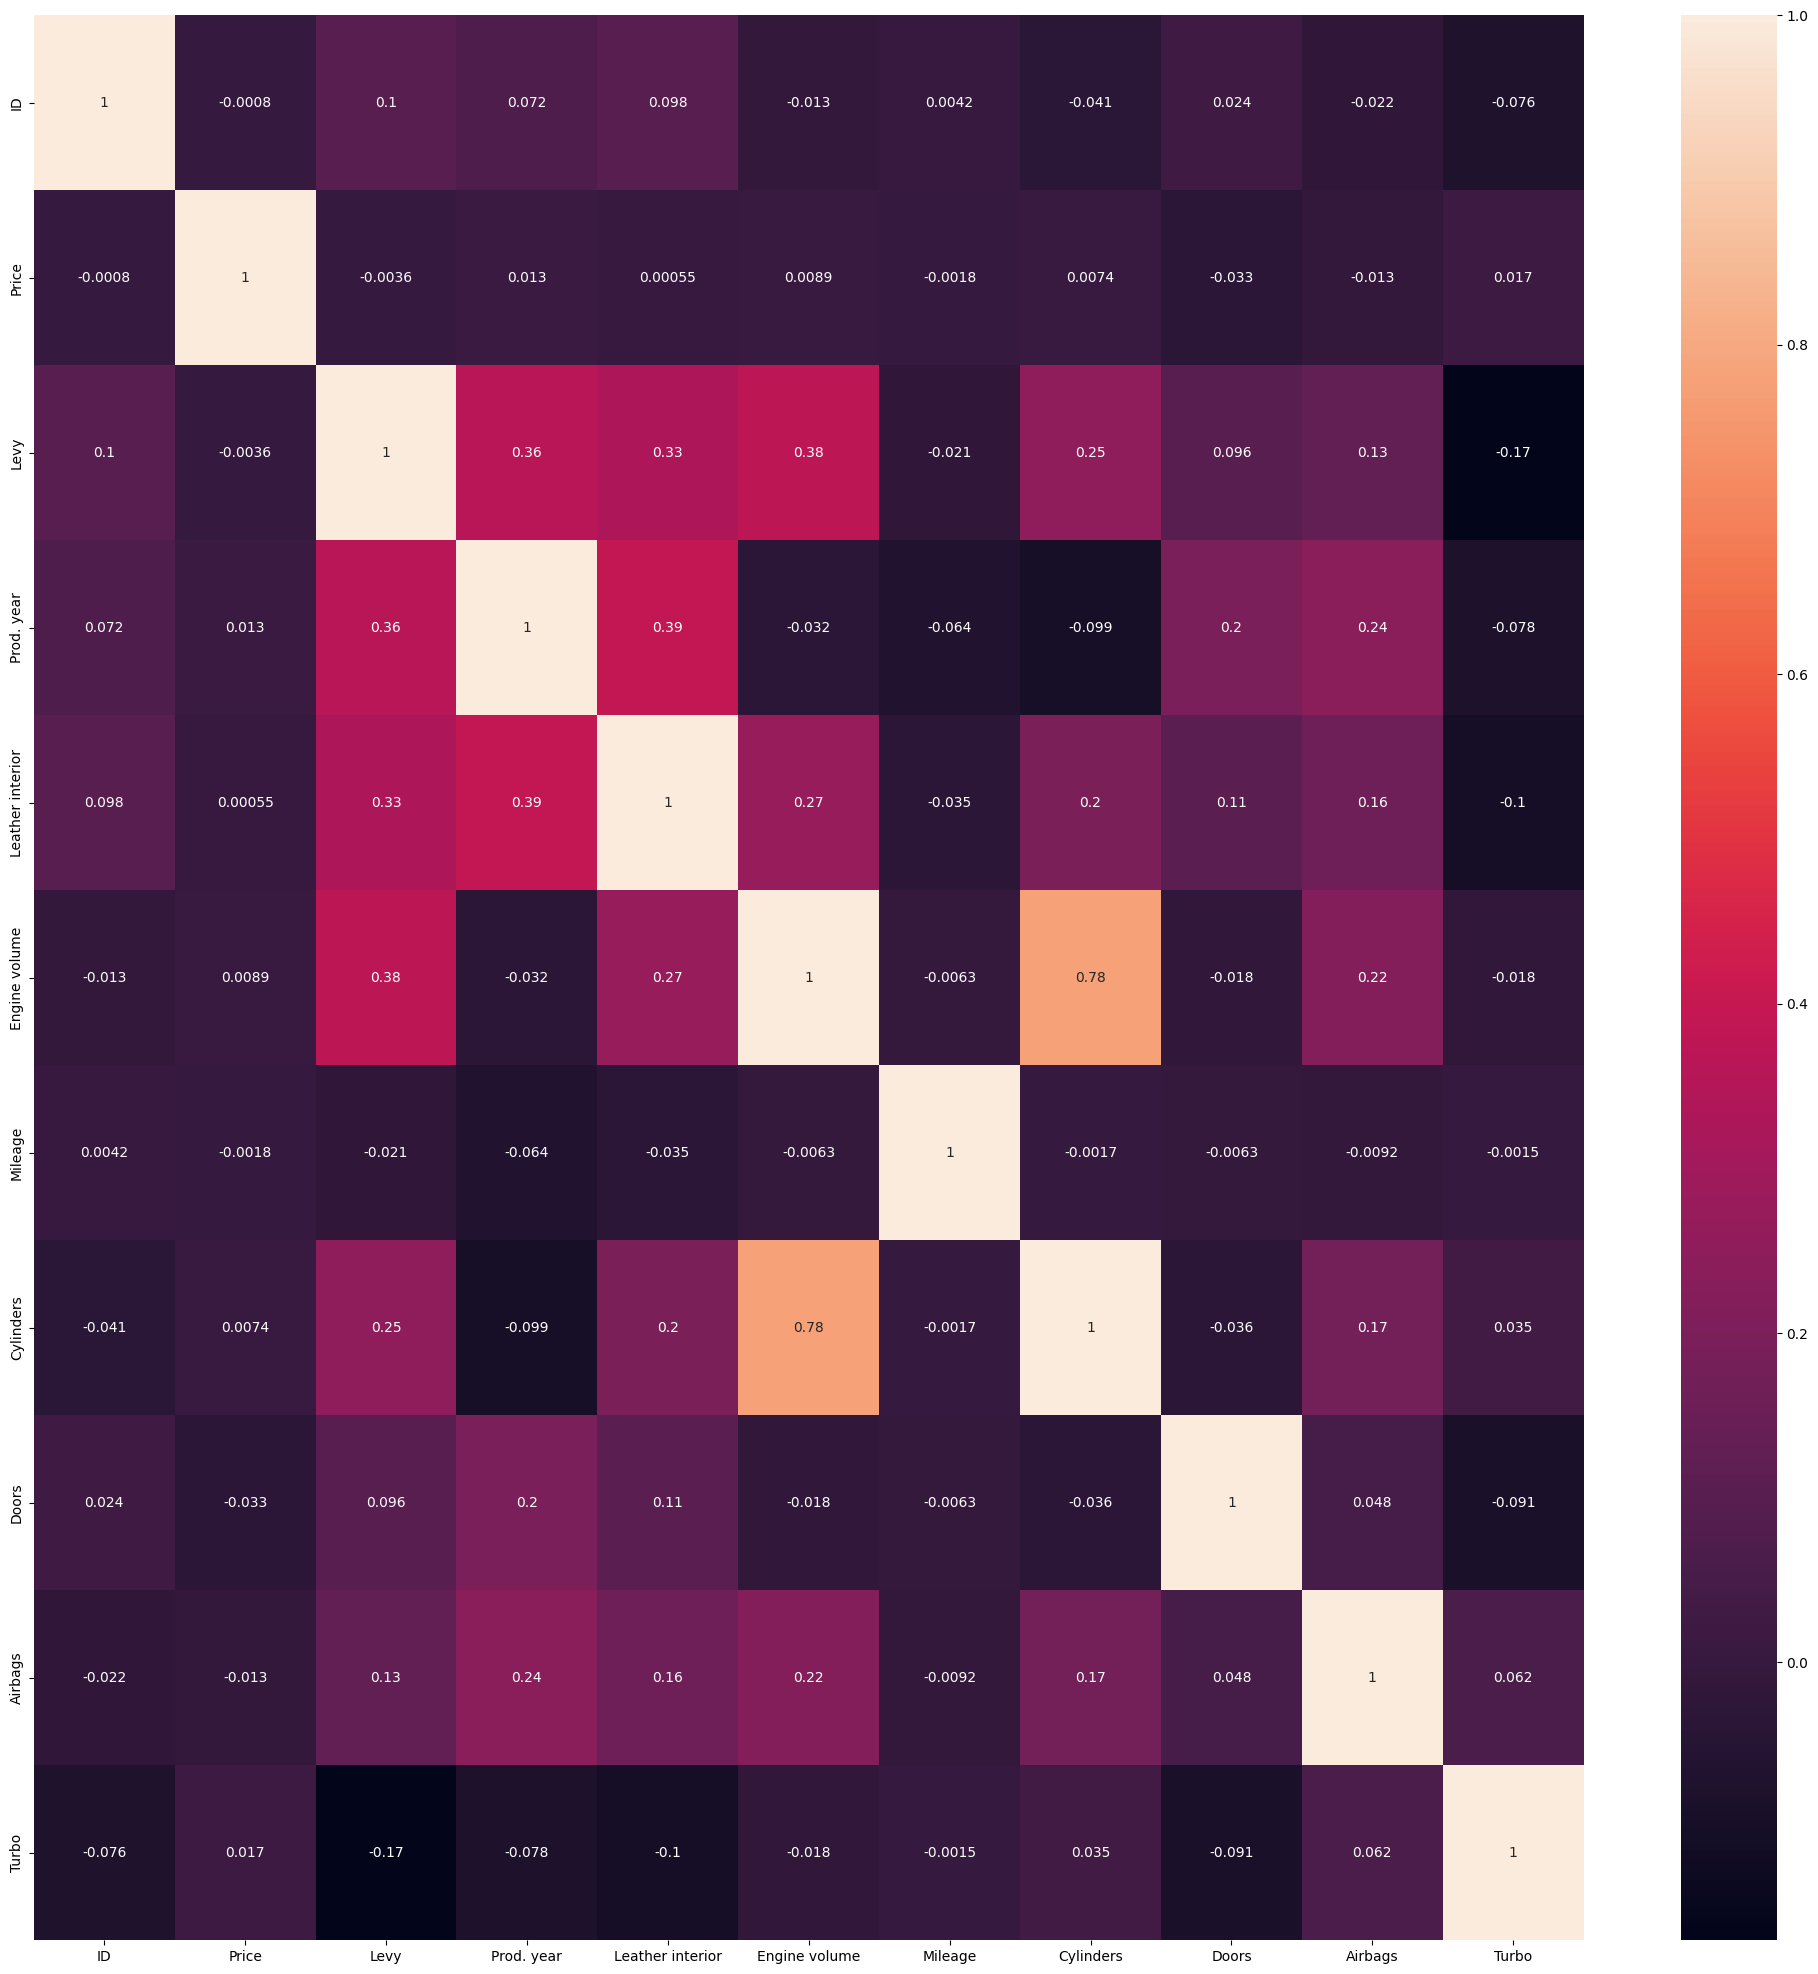

In [47]:
corr= df_train.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr,annot=True)

In [46]:
df_train=pd.read_csv('/content/train.csv')
df_train.drop_duplicates(inplace=True)
df_train.reset_index(drop=True, inplace=True)
# Levy
df_train.Levy = df_train.Levy.map(lambda x:0 if x== '-' else x)
df_train.Levy=df_train.Levy.astype('float')
#Leather interior
df_train['Leather interior']=df_train['Leather interior'].map(lambda x:True if x== 'Yes' else False)
df_train['Leather interior']= df_train['Leather interior']*1
#Mileage
df_train.Mileage= df_train.Mileage.map(lambda x: x.rstrip(' km'))
df_train.Mileage= df_train.Mileage.astype('float')
#Doors
df_train.Doors=df_train.Doors.map(lambda x: x.rstrip('-May'))
df_train.Doors=df_train.Doors.map(lambda x: x.rstrip('-Mar'))
df_train.Doors=df_train.Doors.map(lambda x: x.lstrip('>'))
df_train.Doors= df_train.Doors.astype('int')
#Engine volume
df_train['Turbo']=df_train['Engine volume'].str.contains('Turbo').astype('int')
df_train['Engine volume']=df_train['Engine volume'].map(lambda x:x.rstrip(' Turbo'))
df_train['Engine volume']= df_train['Engine volume'].astype('float')


In [52]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18924 entries, 0 to 18923
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  float64
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  int64  
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  float64
 10  Mileage           18924 non-null  float64
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  int64  
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object

In [53]:
cat_col = [col for col in df_train.columns if df_train[col].dtypes == 'object']
cat_col

['Manufacturer',
 'Model',
 'Category',
 'Fuel type',
 'Gear box type',
 'Drive wheels',
 'Wheel',
 'Color']

In [54]:
df_test=pd.read_csv('/content/test.csv')
df_test.drop_duplicates(inplace=True)
df_test.reset_index(drop=True, inplace=True)
# Levy
df_test.Levy = df_test.Levy.map(lambda x:0 if x== '-' else x)
df_test.Levy=df_test.Levy.astype('float')
#Leather interior
df_test['Leather interior']=df_test['Leather interior'].map(lambda x:True if x== 'Yes' else False)
df_test['Leather interior']= df_test['Leather interior']*1
#Mileage
df_test.Mileage= df_test.Mileage.map(lambda x: x.rstrip(' km'))
df_test.Mileage= df_test.Mileage.astype('float')
#Doors
df_test.Doors=df_test.Doors.map(lambda x: x.rstrip('-May'))
df_test.Doors=df_test.Doors.map(lambda x: x.rstrip('-Mar'))
df_test.Doors=df_test.Doors.map(lambda x: x.lstrip('>'))
df_test.Doors= df_test.Doors.astype('int')
#Engine volume
df_test['Turbo']=df_test['Engine volume'].str.contains('Turbo').astype('int')
df_test['Engine volume']=df_test['Engine volume'].map(lambda x:x.rstrip(' Turbo'))
df_test['Engine volume']= df_test['Engine volume'].astype('float')

In [55]:
all_data = pd.concat([df_train,df_test], axis=0)
all_data

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,45654403,13328.0,1399.0,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005.0,6.0,Automatic,4x4,4,Left wheel,Silver,12,0
1,44731507,16621.0,1018.0,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,4,Left wheel,Black,8,0
2,45774419,8467.0,0.0,HONDA,FIT,2006,Hatchback,0,Petrol,1.3,200000.0,4.0,Variator,Front,4,Right-hand drive,Black,2,0
3,45769185,3607.0,862.0,FORD,Escape,2011,Jeep,1,Hybrid,2.5,168966.0,4.0,Automatic,4x4,4,Left wheel,White,0,0
4,45809263,11726.0,446.0,HONDA,FIT,2014,Hatchback,1,Petrol,1.3,91901.0,4.0,Automatic,Front,4,Left wheel,Silver,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8165,44824410,NaN,1357.0,FIAT,Stilo,2004,Universal,0,Petrol,1.6,164000.0,4.0,Manual,Front,4,Left wheel,Blue,6,0
8166,45682346,NaN,0.0,BMW,528 F10,2012,Sedan,1,Petrol,2.8,156000.0,4.0,Tiptronic,Front,4,Left wheel,Black,6,1
8167,45649860,NaN,1646.0,LEXUS,GX 460,2015,Jeep,1,Petrol,4.6,102907.0,8.0,Automatic,4x4,4,Left wheel,Black,0,0
8168,45809706,NaN,784.0,TOYOTA,Aqua,2017,Hatchback,1,Petrol,1.5,3000.0,4.0,Automatic,Front,4,Left wheel,Green,4,0


In [56]:
lb= LabelEncoder()
for col in cat_col:
    lb.fit(all_data[col])
    df_train[col]=lb.transform(df_train[col])
df_train

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,45654403,13328,1399.0,33,1547,2010,4,1,2,3.5,186005.0,6.0,0,0,4,0,12,12,0
1,44731507,16621,1018.0,8,816,2011,4,0,5,3.0,192000.0,6.0,2,0,4,0,1,8,0
2,45774419,8467,0.0,22,849,2006,3,0,5,1.3,200000.0,4.0,3,1,4,1,1,2,0
3,45769185,3607,862.0,16,819,2011,4,1,2,2.5,168966.0,4.0,0,0,4,0,14,0,0
4,45809263,11726,446.0,22,849,2014,3,1,5,1.3,91901.0,4.0,0,1,4,0,12,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18919,45798355,8467,0.0,37,477,1999,1,1,0,2.0,300000.0,4.0,1,2,2,0,12,5,1
18920,45778856,15681,831.0,24,1657,2011,9,1,5,2.4,161600.0,4.0,2,1,4,0,11,8,0
18921,45804997,26108,836.0,24,1795,2010,4,1,1,2.0,116365.0,4.0,0,1,4,0,7,4,0
18922,45793526,5331,1288.0,8,566,2007,4,1,1,2.0,51258.0,4.0,0,1,4,0,1,4,0


In [58]:
df_train['Log_Price']= np.log(df_train.Price)
X= df_train.drop(['Price','ID'],axis=1)
y= X.pop('Log_Price')
train_x, val_x, train_y,val_y = train_test_split(X,y,test_size= 0.2, random_state=89)

In [59]:
xg_model = XGBRegressor(n_estimators= 1000,max_depth =100,early_stopping_rounds=25)
xg_model.fit(train_x, train_y, eval_set=[(train_x, train_y),(val_x, val_y)] )

[0]	validation_0-rmse:6.13459	validation_1-rmse:6.12557
[1]	validation_0-rmse:4.36455	validation_1-rmse:4.36907
[2]	validation_0-rmse:3.13001	validation_1-rmse:3.16727
[3]	validation_0-rmse:2.26867	validation_1-rmse:2.36084
[4]	validation_0-rmse:1.66215	validation_1-rmse:1.83215
[5]	validation_0-rmse:1.23057	validation_1-rmse:1.49512
[6]	validation_0-rmse:0.92497	validation_1-rmse:1.29718
[7]	validation_0-rmse:0.70897	validation_1-rmse:1.18220
[8]	validation_0-rmse:0.55455	validation_1-rmse:1.12031
[9]	validation_0-rmse:0.44419	validation_1-rmse:1.08631
[10]	validation_0-rmse:0.36482	validation_1-rmse:1.07001
[11]	validation_0-rmse:0.30773	validation_1-rmse:1.06182
[12]	validation_0-rmse:0.26748	validation_1-rmse:1.05632
[13]	validation_0-rmse:0.23913	validation_1-rmse:1.05220
[14]	validation_0-rmse:0.21923	validation_1-rmse:1.05021
[15]	validation_0-rmse:0.20552	validation_1-rmse:1.04926
[16]	validation_0-rmse:0.19622	validation_1-rmse:1.04956
[17]	validation_0-rmse:0.18990	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=25,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=100, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [60]:
cal_error(val_y, xg_model.predict(val_x))

r square: 0.587079602443682
mae: 0.5134718569862354
mse root: 1.0489906205794917
mape: 0.07896320350946608


In [61]:
lb= LabelEncoder()
for col in cat_col:
    lb.fit(all_data[col])
    df_test[col]=lb.transform(df_test[col])


In [62]:
ID= df_test.ID
log_prediction = xg_model.predict(df_test.drop(['ID','Price'], axis=1))
log_prediction

array([ 9.468617 ,  9.736227 ,  8.608229 , ...,  6.244214 , 10.517732 ,
        6.2569313], dtype=float32)

In [63]:
prediction= np.exp(log_prediction)
prediction.shape

(8170,)

In [64]:
submission =pd.DataFrame({'ID':ID, 'Prediction':prediction})
submission

,ID,Prediction
0,44020629,12946.974609
1,45784798,16919.583984
2,45800257,5476.539551
3,45797981,6153.393555
4,45814303,4654.647461
...,...,...
8165,44824410,5215.881836
8166,45682346,18986.119141
8167,45649860,515.024292
8168,45809706,36965.179688
